In [97]:
import folium
import branca
import numpy as np
import pandas as pd
from MoviaBusDataset import MoviaBusDataset
import matplotlib.pyplot as plt

In [2]:
prev_timesteps = 0
prediction_steps = 0

train = MoviaBusDataset('../data/train', 
                        interpolation=True,
                        max_future_time_steps=prediction_steps,
                        timeofday=True,
                        agg_time=5)
test = MoviaBusDataset('../data/test', 
                       interpolation=True,
                       max_future_time_steps=prediction_steps,
                       timeofday=True,
                       agg_time=5)
train = pd.concat(train.dataframes).unstack().reset_index().rename(columns={0:"Speed"})
test = pd.concat(test.dataframes).unstack().reset_index().rename(columns={0:"Speed"})

In [3]:
train2 = train.pivot(index='Time', columns='LinkRef',values='Speed')
train3 = train2.groupby(['TimeOfDay']).mean()
train3.head()
#train2.head()

LinkRef,103524893:266482296:1195317079,103524902:1242123651:1195317083,103524902:1242123670:3396253208,103524902:3396253208:1242123651,108233932:576722:4279694303,108233935:4279694307:1195317078,108233940:4459313602:4279694306,115678954:1306239263:576726,115678957:282678754:1306239519,115678974:10939966:282678730,...,87451616:4121323609:4929002366,87451616:4929002366:4121323609,87502481:4279694293:4279694295,87502481:4279694295:4279694293,87502482:1614362060:1614362080,87502482:1614362080:1614362060,87724803:20908158:20908159,87724803:20908158:792844,87724803:20908159:20908158,87724803:792844:20908158
TimeOfDay,,,,,,,,,,,,,,,,,,,,,
0.272727,10.586677,8.307277,7.812836,9.854972,10.657708,3.985663,7.688182,4.537899,3.435000,8.061250,...,8.590560,11.160081,10.373333,5.566503,10.806875,10.329833,9.791984,6.838222,10.966746,5.218057
0.276515,10.586677,8.307277,7.812836,9.854972,10.657708,5.598163,8.858750,5.229723,3.367750,8.057292,...,8.590560,10.975731,10.373333,7.801527,10.806875,10.568615,10.304474,7.941940,10.932794,5.479565
0.280303,10.518573,8.011306,5.670995,9.599727,9.691250,4.440087,10.241667,4.387331,2.195500,7.889792,...,8.761126,10.791380,11.060126,10.040603,11.592271,10.669866,10.816964,6.140973,10.438181,5.741074
0.284091,9.599584,9.811369,9.514378,9.572298,8.724792,2.718929,4.745625,3.378510,3.860688,6.736250,...,9.782007,10.977012,11.746920,7.312264,11.890167,10.350442,11.590149,7.006196,10.152567,7.313582
0.287879,11.921979,9.577267,5.758870,9.146431,10.592083,4.740062,7.630243,5.964123,3.555875,7.232875,...,9.663287,11.162643,11.575237,5.113144,11.565250,10.270224,11.316637,7.597411,10.243464,6.928047


In [4]:
test2 = test.pivot(index='Time', columns='LinkRef',values='Speed')
test3 = test2.groupby(['TimeOfDay']).mean()
test3.head()

LinkRef,103524893:266482296:1195317079,103524902:1242123651:1195317083,103524902:1242123670:3396253208,103524902:3396253208:1242123651,108233932:576722:4279694303,108233935:4279694307:1195317078,108233940:4459313602:4279694306,115678954:1306239263:576726,115678957:282678754:1306239519,115678974:10939966:282678730,...,87451616:4121323609:4929002366,87451616:4929002366:4121323609,87502481:4279694293:4279694295,87502481:4279694295:4279694293,87502482:1614362060:1614362080,87502482:1614362080:1614362060,87724803:20908158:20908159,87724803:20908158:792844,87724803:20908159:20908158,87724803:792844:20908158
TimeOfDay,,,,,,,,,,,,,,,,,,,,,
0.272727,11.117895,9.069333,5.599677,10.274545,11.62250,7.204286,9.782500,6.564444,0.250000,8.590000,...,8.828462,11.786250,9.346250,11.738571,11.11000,12.7420,11.528333,0.410000,10.467143,5.499286
0.276515,11.117895,9.069333,5.599677,10.274545,11.62250,7.204286,10.384583,5.871508,2.273333,9.105000,...,8.828462,10.461875,9.346250,12.720952,11.11000,12.7930,10.587024,10.181667,10.467143,5.273571
0.280303,11.117895,9.069333,5.599677,10.274545,10.43125,4.833319,10.986667,5.178571,4.296667,6.060000,...,9.169967,9.137500,10.753750,13.703333,11.50750,12.8440,9.645714,0.560000,9.634127,5.047857
0.284091,9.077826,7.977778,4.895000,8.381667,9.24000,2.462353,4.467500,6.870000,6.320000,6.345000,...,9.511473,10.347333,11.091875,8.440067,11.26675,13.0945,9.422500,8.504286,8.801111,9.126667
0.287879,11.340000,7.205455,5.163824,9.086923,7.38200,5.634510,6.481250,7.183333,5.643333,5.738333,...,9.852979,11.076098,11.430000,3.176800,11.02600,13.3450,10.840250,3.705882,9.633750,0.000000


In [5]:
MAE = abs(test3-train3).mean().mean()
MAE

1.802040044753866

In [6]:
RMSE = np.sqrt(((test3-train3)**2).mean().mean())
RMSE

2.5057254393854915

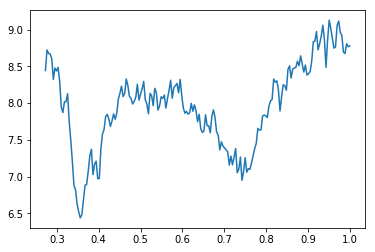

In [7]:
plt.plot(train3.mean(1))

In [120]:
train3.mean()<5

LinkRef
103524893:266482296:1195317079     False
103524902:1242123651:1195317083    False
103524902:1242123670:3396253208    False
103524902:3396253208:1242123651    False
108233932:576722:4279694303        False
108233935:4279694307:1195317078     True
108233940:4459313602:4279694306    False
115678954:1306239263:576726         True
115678957:282678754:1306239519      True
115678974:10939966:282678730       False
115678974:576726:10939966          False
161632579:295133661:4459313617     False
161632579:295133661:576724         False
161632579:4459313617:295133661     False
161632579:576724:295133661         False
161632579:576724:8121560           False
161632579:576725:8121560           False
161632579:8121560:576724           False
161632579:8121560:576725           False
162089321:1649562464:323206292      True
162089321:323206292:1649562464     False
162089324:1649384611:1649384672    False
162089324:1649384672:1649384611    False
162089324:1649384672:1649462945    False
16208932

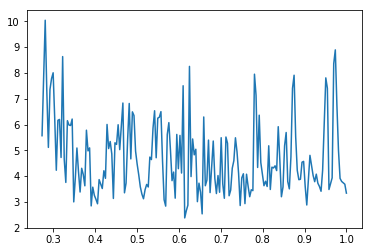

In [93]:
plt.plot(train3['87502481:4279694295:4279694293'])

In [140]:
linkrefs = train.groupby(['LinkRef']).mean()
linkrefs = linkrefs.index[0:-1]
#print(linkrefs[0:-1])
print(linkrefs)


Index(['103524893:266482296:1195317079', '103524902:1242123651:1195317083',
       '103524902:1242123670:3396253208', '103524902:3396253208:1242123651',
       '108233932:576722:4279694303', '108233935:4279694307:1195317078',
       '108233940:4459313602:4279694306', '115678954:1306239263:576726',
       '115678957:282678754:1306239519', '115678974:10939966:282678730',
       ...
       '87451616:4121323609:4929002366', '87451616:4929002366:4121323609',
       '87502481:4279694293:4279694295', '87502481:4279694295:4279694293',
       '87502482:1614362060:1614362080', '87502482:1614362080:1614362060',
       '87724803:20908158:20908159', '87724803:20908158:792844',
       '87724803:20908159:20908158', '87724803:792844:20908158'],
      dtype='object', name='LinkRef', length=194)


In [101]:
#Create two colormaps, one for the mean speed and one for the number of meassurements
cm_mean = branca.colormap.linear.YlOrRd_04.scale(0,train3.max().max())

#Create a map object in valby
m = folium.Map(location=[55.6691591,12.5103835], zoom_start=16)

#Define two style functions, that change the color depending on the value of the mean speed/count
def style_trafic_mean(feature):
    LinkRef = feature['properties']['LinkRef']
    val = train3.mean()
    if len(val)==0:
        val = 0
    else:
        val = val.values[0]
        
    return {
            'fillOpacity': 0.5,
            'weight': 10,
            'color':cm_mean(val)
        }

#Add the geojson with colors
g=folium.GeoJson('../data/road_network.geojson',name='mean speed')
folium.GeoJsonTooltip(['LinkRef']).add_to(g)
g.add_to(m)
#This is a hack to show a colorbar, and also include all the streets
m.choropleth(geo_data='../data/road_network.geojson'
             , data= train3, columns=['LinkRef',train3.mean()]
             , key_on='feature.properties.LinkRef'
             , fill_color='YlOrRd'
             , name='Streets'
             , legend_name='Mean speed [m/s]')
#Add a control layer to our map
folium.LayerControl().add_to(m)

#Show the resulting map
m


KeyError: 'LinkRef'

In [119]:
#LinkRef = 
m = folium.Map(location=[55.6691591,12.5103835], zoom_start=16)
g=folium.GeoJson('../data/road_network.geojson',name='mean speed')
#folium.GeoJsonTooltip(['WayId','Source','Target']).add_to(g)
folium.GeoJsonTooltip(['WayId']).add_to(g)
g.add_to(m)
m

#161632579

AssertionError: Please pass a list or tuple to fields.

In [95]:
train3.max().max()

15.802140406162465